# Análise Exploratória

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## Carga da base

In [2]:
#Colunas selecionadas para carga no DataFrame

variaveis = ['SG_UF_RESIDENCIA'
,'NU_IDADE'
,'TP_SEXO'
,'TP_COR_RACA'
,'TP_ANO_CONCLUIU'
,'TP_ESCOLA'
,'IN_NOME_SOCIAL'
,'NU_NOTA_CN'
,'NU_NOTA_CH'
,'NU_NOTA_LC'
,'NU_NOTA_MT'
,'TP_STATUS_REDACAO'
,'NU_NOTA_REDACAO'
,'TP_LINGUA'
,'Q006'
,'Q025'
,'TP_PRESENCA_CN'
,'TP_PRESENCA_CH'
,'TP_PRESENCA_LC'
,'TP_PRESENCA_MT']

In [3]:
#Carga da base
df_microdados = pd.read_csv('../DADOS/MICRODADOS_ENEM_2019.csv',
                            encoding='ISO-8859-1', 
                            usecols = variaveis, 
                            index_col=None, sep = ';')

f'{len(df_microdados)} Linhas carregadas'

'5095270 Linhas carregadas'

In [4]:
#Dataframes Auxiliares (dimensões)

df_idade = pd.read_excel(open('Tabelas Auxiliares.xlsx', 'rb'), sheet_name='Idade', index_col=None)
df_sexo = pd.read_excel(open('Tabelas Auxiliares.xlsx', 'rb'), sheet_name='Sexo', index_col=None)
df_presente_natureza = pd.read_excel(open('Tabelas Auxiliares.xlsx', 'rb'), sheet_name='PRESENCA_NATUREZA', index_col=None)
df_presente_humanas = pd.read_excel(open('Tabelas Auxiliares.xlsx', 'rb'), sheet_name='PRESENCA_HUMANAS', index_col=None)
df_presente_linguagem = pd.read_excel(open('Tabelas Auxiliares.xlsx', 'rb'), sheet_name='PRESENCA_LINGUAGEM', index_col=None)
df_presente_matematica = pd.read_excel(open('Tabelas Auxiliares.xlsx', 'rb'), sheet_name='PRESENCA_MATEMATICA', index_col=None)
df_acesso_internet = pd.read_excel(open('Tabelas Auxiliares.xlsx', 'rb'), sheet_name='ACESSO_INTERNET', index_col=None)
df_renda_familiar = pd.read_excel(open('Tabelas Auxiliares.xlsx', 'rb'), sheet_name='RENDA_FA', index_col=None)
df_estado = pd.read_excel(open('Tabelas Auxiliares.xlsx', 'rb'), sheet_name='ESTADO', index_col=None)
df_raça = pd.read_excel(open('Tabelas Auxiliares.xlsx', 'rb'), sheet_name='RAÇA', index_col=None)
df_conclusão_medio = pd.read_excel(open('Tabelas Auxiliares.xlsx', 'rb'), sheet_name='CONCLUSAO_ENSINO_ANO', index_col=None)
df_tipo_escola = pd.read_excel(open('Tabelas Auxiliares.xlsx', 'rb'), sheet_name='TIPO_ESCOLA', index_col=None)
df_status_redacao = pd.read_excel(open('Tabelas Auxiliares.xlsx', 'rb'), sheet_name='REDAÇÃO', index_col=None)
df_idioma_escolhido = pd.read_excel(open('Tabelas Auxiliares.xlsx', 'rb'), sheet_name='LINGUAGEM_ESCOLHIDA', index_col=None)

In [5]:
#Merge com os DataFrames Auxiliares
df_microdados = pd.merge(left = df_microdados, right = df_idade, on="NU_IDADE")
df_microdados = pd.merge(left = df_microdados, right = df_sexo, on="TP_SEXO")
df_microdados = pd.merge(left = df_microdados, right = df_raça, on="TP_COR_RACA")
df_microdados = pd.merge(left = df_microdados, right = df_conclusão_medio, on="TP_ANO_CONCLUIU")
df_microdados = pd.merge(left = df_microdados, right = df_tipo_escola, on="TP_ESCOLA")
df_microdados = pd.merge(left = df_microdados, right = df_status_redacao, on="TP_STATUS_REDACAO")
df_microdados = pd.merge(left = df_microdados, right = df_idioma_escolhido, on="TP_LINGUA")
df_microdados = pd.merge(left = df_microdados, right = df_presente_natureza, on="TP_PRESENCA_CN")
df_microdados = pd.merge(left = df_microdados, right = df_presente_humanas, on="TP_PRESENCA_CH")
df_microdados = pd.merge(left = df_microdados, right = df_presente_linguagem, on="TP_PRESENCA_LC")
df_microdados = pd.merge(left = df_microdados, right = df_presente_matematica, on="TP_PRESENCA_MT")
df_microdados = pd.merge(left = df_microdados, right = df_acesso_internet, on="Q025")
df_microdados = pd.merge(left = df_microdados, right = df_renda_familiar, on="Q006")

In [6]:
#Selecionando as colunas de interesse após o merge
filtro=['SG_UF_RESIDENCIA'
,'NU_IDADE'
,'NU_NOTA_CN'
,'NU_NOTA_CH'
,'NU_NOTA_LC'
,'NU_NOTA_MT'
,'NU_NOTA_REDACAO'
,'Tipo Fase'
,'Intervalo Idade'
,'Sexo'
,'Raça Declarada'
,'Conclusão Ensino Médio'
,'Tipo Escola'
,'Status da Redação'
,'Idioma Escolhido'
,'Presença Natureza'
,'Presença Humanas'
,'Presença Linguagem'
,'Presença Matemática'
,'Acesso a Internet'
,'Renda Familiar']

df_microdados = df_microdados[filtro]

In [7]:
#Renomeando as colunas selecionadas

df_microdados.rename(columns={'SG_UF_RESIDENCIA': 'UF'
,'NU_IDADE':'Idade'
,'NU_NOTA_CN':'Nota Ciencias da Natureza'
,'NU_NOTA_CH':'Nota Ciencias Humanas'
,'NU_NOTA_LC':'Nota Linguagem e Código'
,'NU_NOTA_MT':'Nota Matemática'
,'NU_NOTA_REDACAO':'Nota Redação'
,'Tipo Fase':'Grupo Idade'}, inplace = True)

In [8]:
df_microdados.columns

Index(['UF', 'Idade', 'Nota Ciencias da Natureza', 'Nota Ciencias Humanas',
       'Nota Linguagem e Código', 'Nota Matemática', 'Nota Redação',
       'Grupo Idade', 'Intervalo Idade', 'Sexo', 'Raça Declarada',
       'Conclusão Ensino Médio', 'Tipo Escola', 'Status da Redação',
       'Idioma Escolhido', 'Presença Natureza', 'Presença Humanas',
       'Presença Linguagem', 'Presença Matemática', 'Acesso a Internet',
       'Renda Familiar'],
      dtype='object')

## Graficos

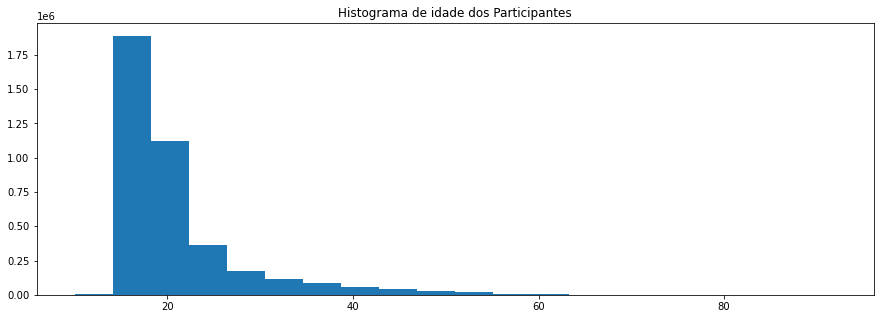

In [9]:
#Histograma de idade
plt.figure(figsize=(15,5))
plt.hist(df_microdados['Idade'], bins=20)
plt.title('Histograma de idade dos Participantes')
plt.show()

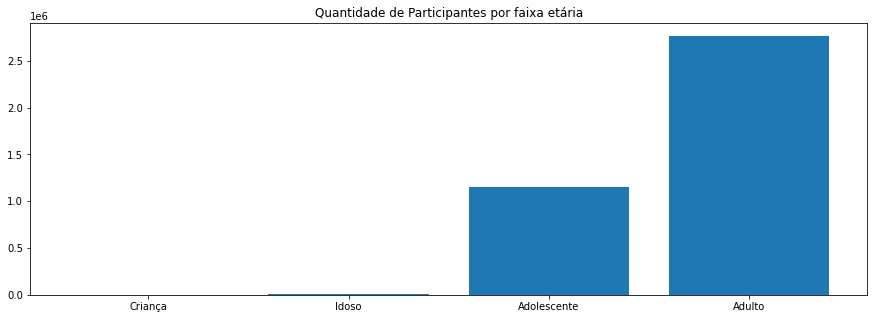

In [10]:
df_grupo_idade = df_microdados.groupby(['Grupo Idade'])[['UF']].count()
df_grupo_idade.rename(columns={'UF':'count'}, inplace=True)
df_grupo_idade.sort_values(['count'], inplace=True)

plt.figure(figsize=(15,5))
plt.bar(df_grupo_idade.index, df_grupo_idade['count'])
plt.title('Quantidade de Participantes por faixa etária')
plt.show()


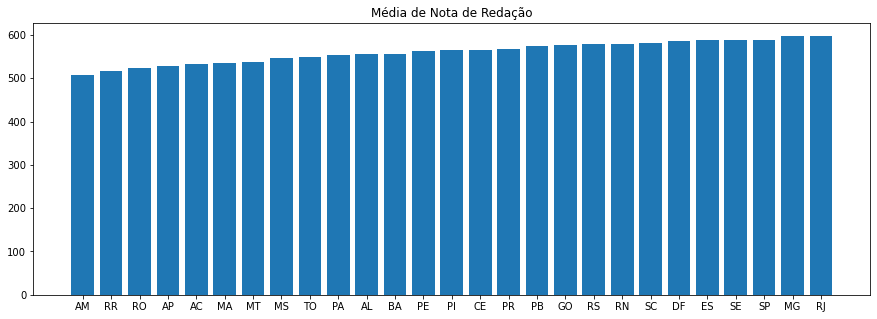

In [11]:
#Média de nota de redação por UF
df_notas_por_UF = df_microdados.groupby(['UF'])[['Nota Redação']].mean()
df_notas_por_UF.sort_values(['Nota Redação'], inplace=True)

plt.figure(figsize=(15,5))
plt.bar(df_notas_por_UF.index, df_notas_por_UF['Nota Redação'])
plt.title('Média de Nota de Redação')
plt.show()

## Exportando base tratada para CSV

In [12]:
df_microdados.to_csv('DW.csv', encoding='ISO-8859-1', index=False,sep=";")